<p align="center">
    <h1 align="center">Playing with Pandas</h1>
   <img src="pandas.jpg" width="600px" >
</p>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as p
%matplotlib inline

### Topics

<br> ** 1 . Creating a dataframe ** </br>
<br> ** 2 . Reading a dataframe from multiple sources ** </br>
** Slice and dice **
** Accessing rows and columns in dataframe **
** unique values for a column **
** Filtering rows in a dataframe **
** Creating a new columns based on existing columns **
** Apply a function on existing column **
** Pipe **
** Reshape and transform **
** Pivot **
** Pivot table **
** Visualisation **


In [29]:
sample_df = pd.DataFrame({'A' : ['2','3','7'],
                         'B' : ['5','6','8']})

In [31]:
sample_df.head()

,A,B
0,2,5
1,3,6
2,7,8


In [32]:
constituents_df = pd.read_csv('SNP_500_companies/constituents_csv.csv')

In [33]:
constituents_df.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [35]:
constituents_df[:7]

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology
5,ATVI,Activision Blizzard,Information Technology
6,AYI,Acuity Brands Inc,Industrials


In [43]:
constituents_df[:10]['Symbol']

0     MMM
1     AOS
2     ABT
3    ABBV
4     ACN
5    ATVI
6     AYI
7    ADBE
8     AAP
9     AMD
Name: Symbol, dtype: object

In [45]:
constituents_df.iloc[10]['Sector']

'Utilities'

In [53]:
constituents_df['Name'].nunique()

505

In [54]:
constituents_df['Sector'].value_counts()

Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

In [58]:
constituents_df[constituents_df['Sector']=='Utilities'][:5]

,Symbol,Name,Sector
10,AES,AES Corp,Utilities
25,LNT,Alliant Energy Corp,Utilities
31,AEE,Ameren Corp,Utilities
33,AEP,American Electric Power,Utilities
37,AWK,American Water Works Company Inc,Utilities


In [59]:
constituents_df[(constituents_df['Sector']=='Utilities') & (constituents_df['Name'].str.startswith('A'))]

,Symbol,Name,Sector
10,AES,AES Corp,Utilities
25,LNT,Alliant Energy Corp,Utilities
31,AEE,Ameren Corp,Utilities
33,AEP,American Electric Power,Utilities
37,AWK,American Water Works Company Inc,Utilities


In [82]:
constituents_financials_df = pd.read_csv('SNP_500_companies/constituents-financials_csv.csv')

In [83]:
constituents_financials_df.head()

,Symbol,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [68]:
constituents_financials_df.drop(['Name'], axis=1,inplace=True)

In [69]:
constituents_financials_df.head()

,Symbol,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,Sales/Earnings
0,MMM,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...,5.537244
1,AOS,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...,7.763987
2,ABT,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...,6.017944
3,ABBV,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...,3.085080
4,ACN,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...,9.780667


In [62]:
constituents_financials_df['Sales/Earnings'] = constituents_financials_df['Price/Earnings'] * (1/constituents_financials_df['Price/Sales'])

In [71]:
def mul_by_100(x):
    return x*100

In [72]:
constituents_financials_df['Sales/Earnings'] = constituents_financials_df['Sales/Earnings'].apply(mul_by_100)

In [73]:
constituents_financials_df['Sales/Earnings'].head()

0    553.724398
1    776.398688
2    601.794358
3    308.508002
4    978.066654
Name: Sales/Earnings, dtype: float64

In [75]:
constituents_financials_df['Sector'].value_counts()

Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

In [79]:
constituents_financials_df.columns

Index(['Symbol', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings', 'Sales/Earnings'],
      dtype='object')

In [78]:
constituents_financials_df.groupby('Sector').agg({'Earnings/Share':max, 'Price': min, 'Market Cap' : is_even})

,Earnings/Share,Price
Sector,,
Consumer Discretionary,44.09,10.43
Consumer Staples,9.27,19.96
Energy,9.93,2.82
Financials,30.30,13.38
Health Care,38.35,25.20
Industrials,18.73,14.45
Information Technology,22.27,11.22
Materials,18.61,17.16
Real Estate,6.81,14.01


In [80]:
constituents_financials_df[constituents_financials_df['Sector']=='Consumer Discretionary']

,Symbol,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,Sales/Earnings
8,AAP,Consumer Discretionary,109.63,19.54,0.218321,6.19,169.550,78.8100,8123611867,8.539410e+08,1.130106,2.51,http://www.sec.gov/cgi-bin/browse-edgar?action...,1729.041194
30,AMZN,Consumer Discretionary,1350.50,296.16,0.000000,6.16,1498.000,812.5000,685873374731,1.613200e+10,3.927053,24.28,http://www.sec.gov/cgi-bin/browse-edgar?action...,7541.533053
53,APTV,Consumer Discretionary,89.27,69.74,0.939268,5.05,96.910,82.9700,24906530300,2.370000e+09,1.502580,7.56,http://www.sec.gov/cgi-bin/browse-edgar?action...,4641.350829
61,AZO,Consumer Discretionary,718.57,16.31,0.000000,44.09,797.890,491.1300,19922021415,2.347304e+09,1.851043,136.23,http://www.sec.gov/cgi-bin/browse-edgar?action...,881.124905
71,BBY,Consumer Discretionary,68.79,19.22,1.908504,3.81,78.590,41.6700,20831186176,2.555000e+09,0.767155,4.79,http://www.sec.gov/cgi-bin/browse-edgar?action...,2505.359965
76,BWA,Consumer Discretionary,51.94,14.15,1.236364,0.55,58.220,37.5400,11596117445,8.679000e+08,1.583138,2.89,http://www.sec.gov/cgi-bin/browse-edgar?action...,893.794702
90,KMX,Consumer Discretionary,64.34,19.44,0.000000,3.97,77.640,54.2900,11827453706,1.339628e+09,0.691386,3.55,http://www.sec.gov/cgi-bin/browse-edgar?action...,2811.743774
91,CCL,Consumer Discretionary,66.76,17.48,2.604167,3.58,72.700,54.7500,49180044050,4.711000e+09,2.814778,2.00,http://www.sec.gov/cgi-bin/browse-edgar?action...,621.008056
95,CBS,Consumer Discretionary,51.80,12.05,1.347305,2.81,70.095,52.7500,20431395736,2.841000e+09,2.105502,6.91,http://www.sec.gov/cgi-bin/browse-edgar?action...,572.310153
103,CHTR,Consumer Discretionary,348.65,162.92,0.000000,34.08,408.830,308.3000,86708878113,1.469400e+10,2.120863,2.27,http://www.sec.gov/cgi-bin/browse-edgar?action...,7681.777148


In [101]:
??constituents_financials_df.pivot

In [107]:
constituents_financials_df.pivot(index='Sector',columns ='Symbol',values='Price/Earnings')

Symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,NaN,NaN,19.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27.25,NaN,NaN,NaN
Consumer Staples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Financials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-19.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.73,NaN
Health Care,27.45,NaN,NaN,NaN,19.41,15.54,22.51,NaN,NaN,NaN,...,NaN,NaN,NaN,22.65,NaN,NaN,NaN,14.32,NaN,32.8
Industrials,NaN,9.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.94,NaN,NaN,NaN,NaN
Information Technology,NaN,NaN,NaN,16.86,NaN,NaN,NaN,25.47,52.31,17.67,...,NaN,27.19,NaN,NaN,8.87,NaN,NaN,NaN,NaN,NaN
Materials,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Real Estate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
constituents_financials_df.plot.scatter??

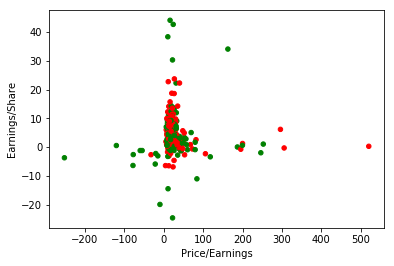

In [111]:
constituents_financials_df.plot.scatter(x='Price/Earnings', y='Earnings/Share',c=['RED','GREEN'])

In [112]:
constituents_financials_df.columns

Index(['Symbol', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

In [113]:
??constituents_financials_df.plot.line

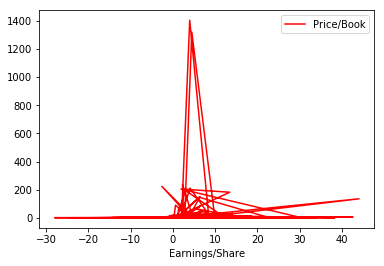

In [116]:
constituents_financials_df.plot.line(y='Price/Book',x='Earnings/Share', c='RED')

In [117]:
from pandas.plotting import scatter_matrix

In [118]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111dd2828>,
      dtype=object)

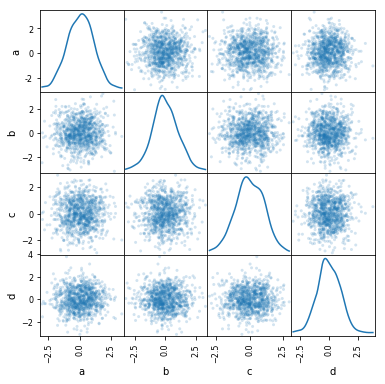

In [119]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')